# Placing roles with State of the Art Models

Following preliminary experimentation with ChatGPT, it was observed that ChatGPT performs effectively when prompted to assume specific roles. Consequently, both ChatGPT and Gemma were prompted to adopt the role of the stand-up comedian corresponding to the transcript from which they were extracting quotes. As expected, ChatGPT outperformed Gemma in this task. Moreover, assuming the role of the comedian enhanced ChatGPT's performance, increasing its score from 40% to 42.8%. However, the standard version of ChatGPT achieved the highest frequency of scores exceeding 60%, as depicted in the graph.

### Imports

In [2]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [3]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
pretend_gemma = pd.read_csv("/home/ada/humor/data/stand_up_dataset/play pretend - Sheet1.csv")
pretend_gpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/play pretend chatgpt - Sheet1.csv")
normal_gpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/nopretend chatgpt - Sheet1.csv")

In [4]:
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj"])]
llm_gemma = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj"])]
llm_pretend_gemma = pretend_gemma.loc[pretend_gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj"])]

### Experiment

In [5]:
normal_gpt_metric = bipartite_metric(normal_gpt, llm_gt)
normal_gpt_metric.mean()

/tmp/ipykernel_3075178/1099743959.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normal_gpt_metric.mean()


score    40.020635
dtype: float64

In [6]:
pretend_gpt_metric = bipartite_metric(pretend_gpt, llm_gt)
pretend_gpt_metric.mean()

/tmp/ipykernel_3075178/1170378115.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pretend_gpt_metric.mean()


score    42.805456
dtype: float64

In [7]:
llm_pretend_gemma_metric = bipartite_metric(llm_pretend_gemma, llm_gt)
llm_pretend_gemma_metric.mean()

/tmp/ipykernel_3075178/1485451137.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  llm_pretend_gemma_metric.mean()


score    29.149603
dtype: float64

In [8]:
llm_gemma_metric = bipartite_metric(llm_gemma, llm_gt)
llm_gemma_metric.mean()

/tmp/ipykernel_3075178/2696414140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  llm_gemma_metric.mean()


score    30.254861
dtype: float64

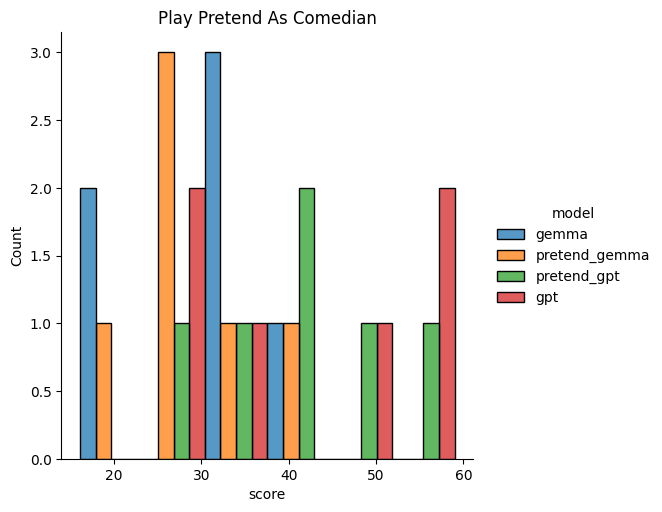

In [9]:
pretend_gemma = llm_pretend_gemma_metric.assign(model="pretend_gemma")
gemma = llm_gemma_metric.assign(model="gemma")
pretend_gpt = pretend_gpt_metric.assign(model="pretend_gpt")
normal_gpt = normal_gpt_metric.assign(model="gpt")
df = pd.concat([gemma, pretend_gemma, pretend_gpt, normal_gpt]).reset_index(drop=True)

sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plt.title("Play Pretend As Comedian")
plt.show()